<h1>Titanic<h1>
<h2>Data exploration:<h2>

In [299]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [300]:
titanic = pd.read_csv("titanic.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [301]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [302]:
print(titanic.shape)
print(titanic.isna().sum())
print(titanic.dtypes)

(891, 12)
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


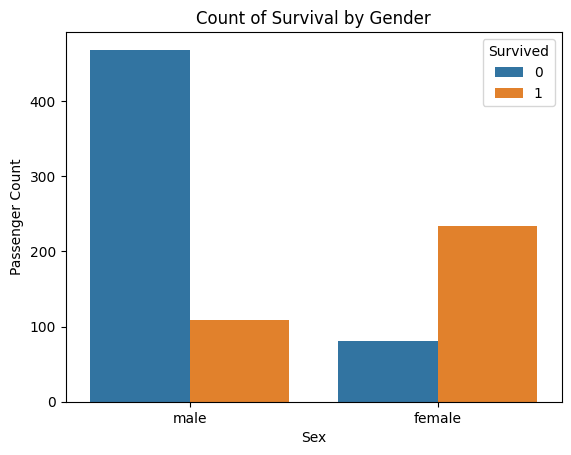

In [303]:
sns.countplot(data=titanic, x="Sex", hue="Survived")
plt.title("Count of Survival by Gender")
plt.ylabel("Passenger Count")
plt.show()


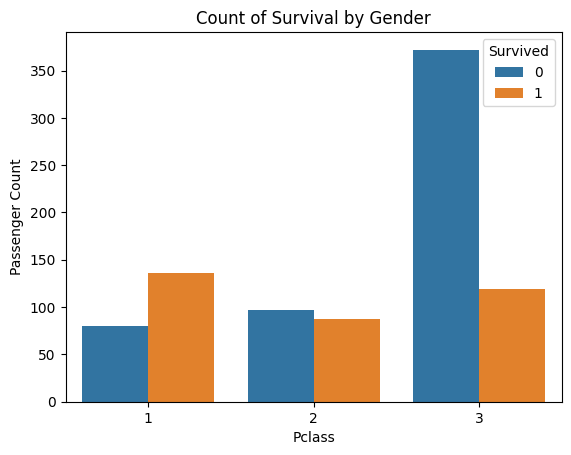

In [304]:
sns.countplot(data=titanic, x="Pclass", hue="Survived")
plt.title("Count of Survival by Gender")
plt.ylabel("Passenger Count")
plt.show()


<h2>Data preprocessing<h2>

Here we drop Cabin column since more than 50% of the values are missing

In [305]:
titanic.drop(columns=["Cabin"],inplace=True)

Analyze distribution of Age column in order to handle missing values:
<li>if the distribution is symetric(normal) we use mean for replacing missing values.
<li>if the distribution is skewed(right or left  skewed) we use median for replacing missing values.

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64
Skewness: 0.38910778230082704


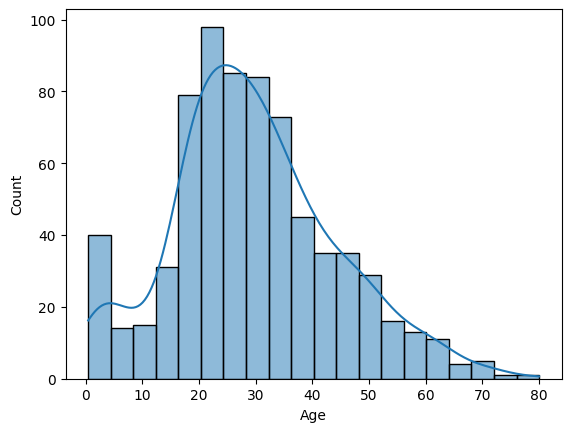

In [306]:
sns.histplot(titanic["Age"], kde=True)
print(titanic["Age"].describe())
print("Skewness:", titanic["Age"].skew())

<li>Here the skewness is 0.38 so it's fairly symetric so we use mean ~ normal distribution
<li>we also drop 2 rows where Embarked values are missing

In [307]:
titanic['Age'] = titanic['Age'].fillna(titanic['Age'].mean())
titanic= titanic.dropna(subset=["Embarked"])
print(titanic.isna().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [308]:
titanic.shape

(889, 11)

One Hot Encoder:

In [309]:
from sklearn.preprocessing import LabelEncoder

titanic[['Sex', 'Embarked']] = titanic[['Sex', 'Embarked']].apply(LabelEncoder().fit_transform)
titanic.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,2


In [310]:
titanic['Title'] = titanic['Name'].str.extract(r',\s*([^\.]+)\.', expand=False)
titanic['Title'] = titanic['Title'].str.strip().str.capitalize()
allowed_titles = ['Mr', 'Mrs', 'Miss', 'Ms']
titanic['Title'] = titanic['Title'].apply(lambda x: x if x in allowed_titles else 'Other')
print(titanic['Title'].unique())


['Mr' 'Mrs' 'Miss' 'Other' 'Ms']


In [311]:
def fix_age(age):
    if age < 1:            # If age is less than 1 (like 0.67)
        return int(age * 100)  # Convert 0.67 → 67, 0.42 → 42, etc.
    else:
        return int(age)       # Else just remove decimal part, 22.0 → 22

titanic['Age'] = titanic['Age'].apply(fix_age)

titanic["Age"].max()

np.int64(92)

In [312]:
bins = [0, 12, 18, 35, 60, 95]
labels = ['Child', 'Teen', 'Young Adult', 'Adult', 'Senior']
titanic['AgeGroup'] = pd.cut(titanic['Age'], bins=bins, labels=labels)
print(titanic['AgeGroup'].value_counts())

AgeGroup
Young Adult    535
Adult          195
Teen            70
Child           62
Senior          27
Name: count, dtype: int64


In [313]:
titanic = titanic.drop(columns=["Name", "Ticket", "PassengerId","AgeGroup"])

In [314]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
titanic['Title'] = le.fit_transform(titanic['Title'])

In [315]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,1,22,1,0,7.2500,2,1
1,1,1,0,38,1,0,71.2833,0,2
2,1,3,0,26,0,0,7.9250,2,0
3,1,1,0,35,1,0,53.1000,2,2
4,0,3,1,35,0,0,8.0500,2,1


<h2>Training<h2>

In [316]:
from sklearn.model_selection import train_test_split
X = titanic.drop(columns=["Survived"])
y = titanic["Survived"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((711, 8), (178, 8), (711,), (178,))

In [317]:
# Imports
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

classification_models = {
    "LogisticRegression": LogisticRegression(),
    "RandomForest": RandomForestClassifier(),
    "XGBoost": XGBClassifier()
}


param_grids = {
    "LogisticRegression": {
        "C": [0.01, 0.1, 1, 10],
        "solver": ["liblinear", "lbfgs"]
    },
    "RandomForest": {
        "n_estimators": [100, 200],
        "max_depth": [None, 10, 20],
        "min_samples_split": [2, 5]
    },
    "XGBoost": {
        "n_estimators": [100, 200],
        "max_depth": [3, 5],
        "learning_rate": [0.01, 0.1]
    }
}
best_models = {}

for name in classification_models:
    print(f"Tuning {name}...")
    grid = GridSearchCV(estimator=classification_models[name],
                        param_grid=param_grids[name],
                        cv=5,
                        scoring='accuracy',
                        n_jobs=-1)
    grid.fit(X_train, y_train)
    best_models[name] = grid.best_estimator_
    print(f"Best parameters for {name}: {grid.best_params_}")
    print(f"Best CV accuracy for {name}: {grid.best_score_:.4f}")




Tuning LogisticRegression...


c:\Users\user\.conda\envs\AI\Lib\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Best parameters for LogisticRegression: {'C': 1, 'solver': 'lbfgs'}
Best CV accuracy for LogisticRegression: 0.8115
Tuning RandomForest...
Best parameters for RandomForest: {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 200}
Best CV accuracy for RandomForest: 0.8439
Tuning XGBoost...
Best parameters for XGBoost: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}
Best CV accuracy for XGBoost: 0.8425


In [318]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score 
for name, model in best_models.items():
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"{name} Test Accuracy: {acc:.4f}")

LogisticRegression Test Accuracy: 0.7865
RandomForest Test Accuracy: 0.7697
XGBoost Test Accuracy: 0.7978


The best model is XGBoost due to its high accuracy

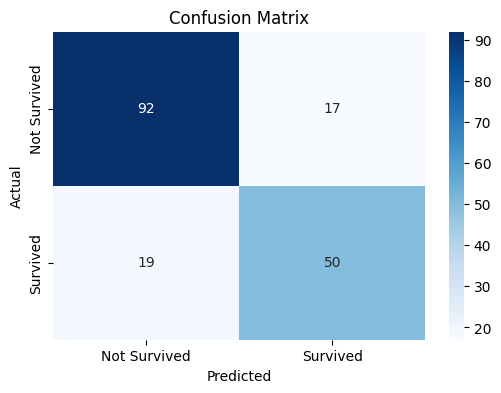

Classification Report:

              precision    recall  f1-score   support

           0       0.83      0.84      0.84       109
           1       0.75      0.72      0.74        69

    accuracy                           0.80       178
   macro avg       0.79      0.78      0.79       178
weighted avg       0.80      0.80      0.80       178



C:\Users\user\AppData\Local\Temp\ipykernel_7836\3611621652.py:32: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "k--" (-> linestyle='--'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1], 'k--', linestyle='--')


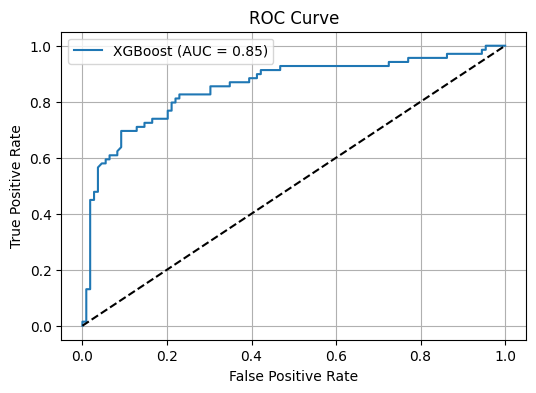

In [319]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import seaborn as sns

# Get best model
xgb_model = best_models['XGBoost']

# Predict probabilities and labels
y_pred = xgb_model.predict(X_test)
y_proba = xgb_model.predict_proba(X_test)[:, 1]  # Probabilities for class 1

# --- 1. Confusion Matrix ---
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# --- 2. Classification Report ---
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

# --- 3. ROC Curve & AUC ---
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'XGBoost (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', linestyle='--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.show()



According to results:
<li>75% of predicted survivors were actually survived
<li>72% of actual survivors were correctly identified
<li>80% overall correct predictions.

In [320]:
import joblib
joblib.dump(best_models['XGBoost'], "best_xgboost_model.pkl")


['best_xgboost_model.pkl']